## Logistic Regression

---
* author:  [Prasert Kanawattanachai](prasert.k@chula.ac.th)
* YouTube: https://www.youtube.com/prasertcbs
* github: https://github.com/prasertcbs/scikitlearn_tutorial
* [Chulalongkorn Business School](https://www.cbs.chula.ac.th/en/)
---

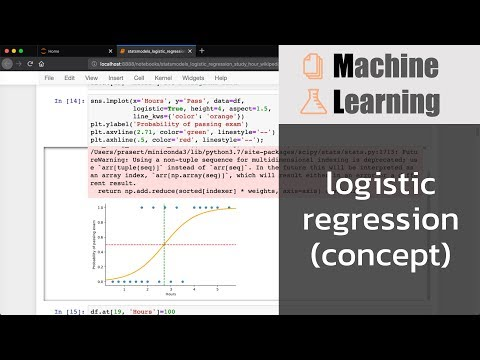

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('zhkTD7rNEBk', width=720, height=405)

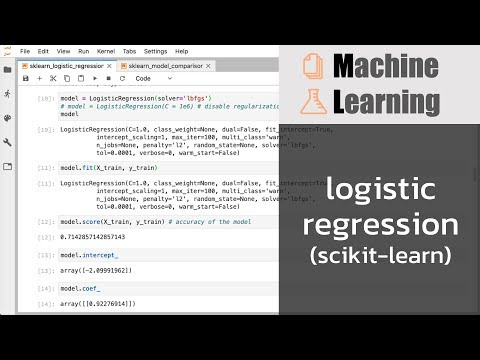

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('l1OWNtuAUUg', width=720, height=405)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
print(f'pandas  version = {pd.__version__}')
print(f'numpy   version = {np.__version__}')
print(f'seaborn version = {sns.__version__}')

pandas  version = 1.3.4
numpy   version = 1.22.4
seaborn version = 0.11.2


**data from wikipedia**  
https://en.wikipedia.org/wiki/Logistic_regression#Probability_of_passing_an_exam_versus_hours_of_study

In [5]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/study_hours.csv')
df.T # transpose

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Hours,0.5,0.75,1.0,1.25,1.5,1.75,1.75,2.0,2.25,2.5,2.75,3.0,3.25,3.5,4.0,4.25,4.5,4.75,5.0,5.5
Pass,0.0,0.00,0.0,0.00,0.0,0.00,1.00,0.0,1.00,0.0,1.00,0.0,1.00,0.0,1.0,1.00,1.0,1.00,1.0,1.0


In [6]:
df['PassFail']=df['Pass'].map({0: 'Fail', 1: 'Pass'})

In [7]:
df

,Hours,Pass,PassFail
0,0.50,0,Fail
1,0.75,0,Fail
2,1.00,0,Fail
3,1.25,0,Fail
4,1.50,0,Fail
5,1.75,0,Fail
6,1.75,1,Pass
7,2.00,0,Fail
8,2.25,1,Pass
9,2.50,0,Fail


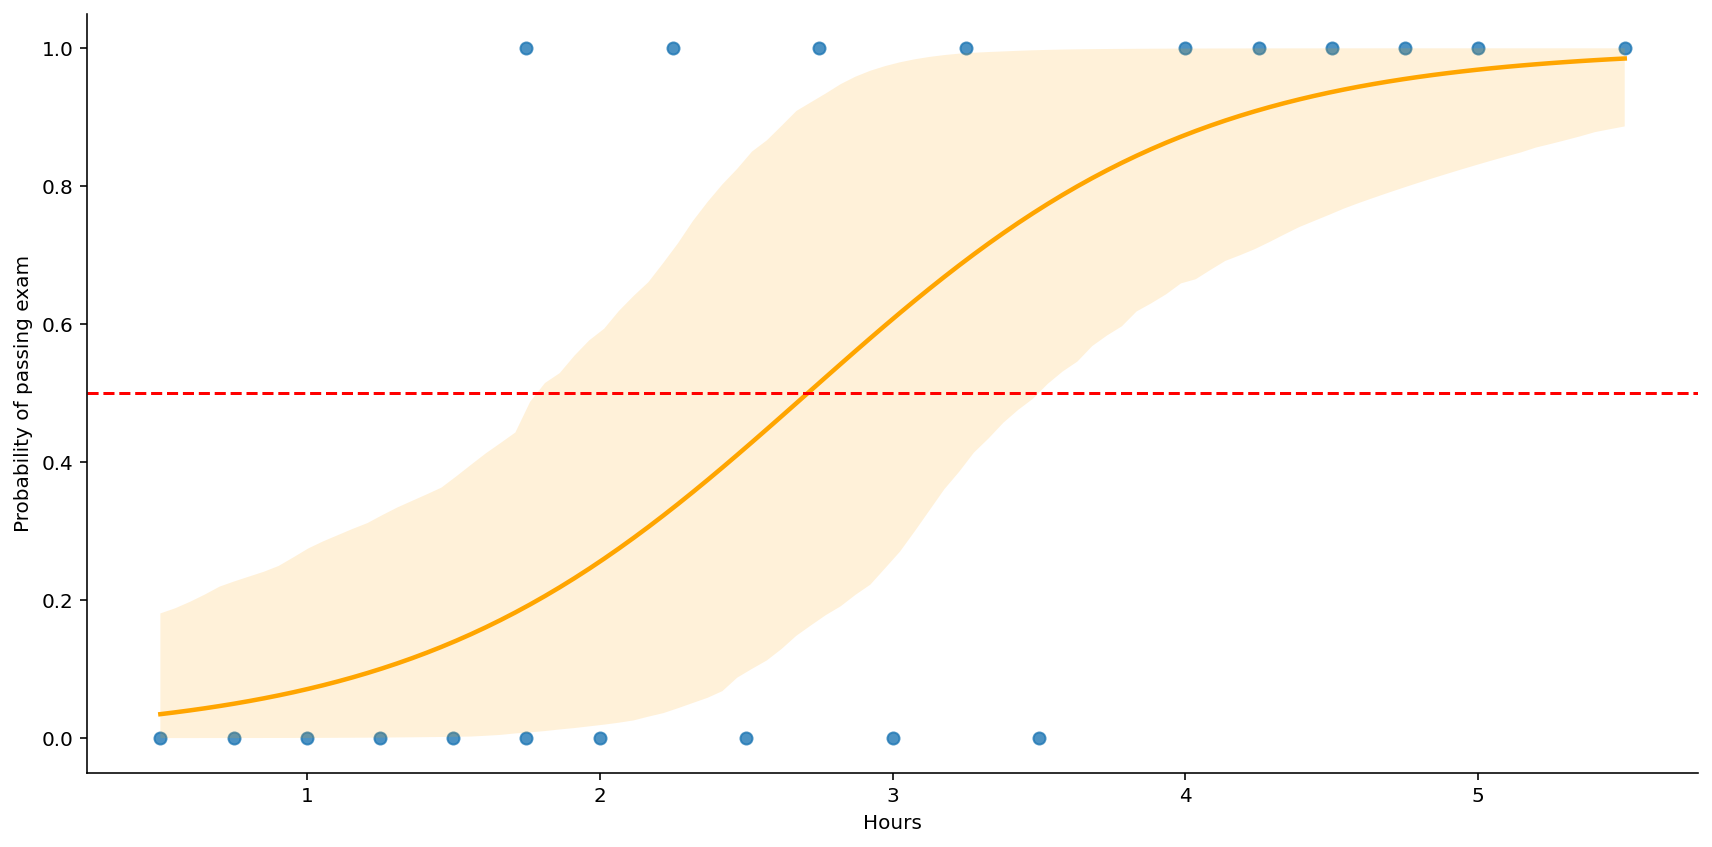

In [8]:
# plt.figure(figsize=(10, 5))
sns.lmplot(x='Hours', y='Pass', data=df,
           logistic=True, height=6, aspect=2, 
           line_kws={'color': 'orange'})
plt.ylabel('Probability of passing exam')
# plt.axvline(2.71, color='green', linestyle='--')
plt.axhline(.5, color='red', linestyle='--');

In [9]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Hours,0.5,0.75,1.0,1.25,1.5,1.75,1.75,2.0,2.25,2.5,2.75,3.0,3.25,3.5,4.0,4.25,4.5,4.75,5.0,5.5
Pass,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1
PassFail,Fail,Fail,Fail,Fail,Fail,Fail,Pass,Fail,Pass,Fail,Pass,Fail,Pass,Fail,Pass,Pass,Pass,Pass,Pass,Pass


# Scikit-learn: LogisticRegression
doc: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

* https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
* https://en.wikipedia.org/wiki/Confusion_matrix

In [11]:
# X, y = df[['Hours']], df.Pass
# X, y = df[['Hours']], df.PassFail
X=df[['Hours']]
y=df['Pass']
# y=df['PassFail']

test_size=0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=7)

In [12]:
X_train

,Hours
18,5.00
6,1.75
13,3.50
19,5.50
10,2.75
14,4.00
8,2.25
16,4.50
9,2.50
12,3.25


In [13]:
len(X_train)

14

In [14]:
X_test

,Hours
1,0.75
17,4.75
2,1.00
5,1.75
11,3.00
0,0.50


In [15]:
y_train

18    1
6     1
13    0
19    1
10    1
14    1
8     1
16    1
9     0
12    1
7     0
3     0
4     0
15    1
Name: Pass, dtype: int64

In [16]:
# model = LogisticRegression(solver='lbfgs')
model = LogisticRegression(C = 1e10) # disable regularization
# model = LogisticRegression() # disable regularization

model

LogisticRegression(C=10000000000.0)

In [17]:
model.fit(X_train, y_train)

LogisticRegression(C=10000000000.0)

In [18]:
model.score(X_train, y_train) # accuracy of the model

0.7142857142857143

In [19]:
X_test

,Hours
1,0.75
17,4.75
2,1.00
5,1.75
11,3.00
0,0.50


In [20]:
y_test

1     0
17    1
2     0
5     0
11    0
0     0
Name: Pass, dtype: int64

In [21]:
model.score(X_test, y_test) # accuracy of the model

0.8333333333333334

In [22]:
model.intercept_

array([-3.13566348])

In [23]:
model.coef_

array([[1.31674599]])

In [24]:
X_test

,Hours
1,0.75
17,4.75
2,1.00
5,1.75
11,3.00
0,0.50


In [25]:
y_test

1     0
17    1
2     0
5     0
11    0
0     0
Name: Pass, dtype: int64

In [26]:
predicted = model.predict(X_test)
predicted

array([0, 1, 0, 0, 1, 0], dtype=int64)

In [27]:
y_test.values

array([0, 1, 0, 0, 0, 0], dtype=int64)

In [28]:
5/6

0.8333333333333334

In [29]:
X_test

,Hours
1,0.75
17,4.75
2,1.00
5,1.75
11,3.00
0,0.50


In [30]:
model.predict_proba(X_test)

array([[0.89549147, 0.10450853],
       [0.04233516, 0.95766484],
       [0.86043618, 0.13956382],
       [0.69664199, 0.30335801],
       [0.30691656, 0.69308344],
       [0.92253438, 0.07746562]])

### logistic regression function

In [31]:
import math

$$f(x)={\frac {1}{1+e^{-x}}}$$

## plot logistic regression with a given threshold

In [32]:
def sp(intercept, coef, x):
    '''
    logistic regression function (propability curve)
    '''
    ex = np.exp(-(intercept + x * coef))
    return (1 / (1 + ex))

def solve(intercept, coef, threshold):
    '''
    หาค่า x ที่ตัดค่า prop (ที่ได้จากสมการ logistic regression) ณ threshold ที่กำหนด
    '''
    return (-np.log(1/threshold-1)-intercept) / coef

def precision(cfm):
    '''
    precision
    '''
    tn, fp, fn, tp = cfm.ravel()
    return tp / (tp + fp)

def tpr(cfm):
    '''
    true positive rate (recall)
    '''
    tn, fp, fn, tp = cfm.ravel()
    return tp / (tp + fn)

def fpr(cfm):
    '''
    false positive rate'''
    tn, fp, fn, tp = cfm.ravel()
    return fp / (fp + tn)

def cm(model, X, y, thres=.5):
    '''
    confusion matrix at a given threshold
    '''
    y_score=model.predict_proba(X)[:, 1]
    y_pred_tmp=np.where(y_score >= thres, 1, 0)
    return metrics.confusion_matrix(y, y_pred_tmp)

def plot_threshold(model, X, y, thres):
    '''
    plot logistic regression with a given threshold
    '''
    y_score=model.predict_proba(X)[:, 1]
    y_pred_tmp=np.where(y_score >= thres, 1, 0)
    cfm=cm(model, X, y, thres)
    
    xp=np.linspace(np.min(X), np.max(X), 30)
    yp=sp(model.intercept_, model.coef_, xp).ravel()
    plt.scatter(X, y, c=y_pred_tmp)
    plt.plot(xp, yp, color='lightblue')
    plt.axhline(thres, color='salmon', linestyle='--')
    plt.axvline(solve(model.intercept_, model.coef_, thres), color='green', linestyle='--')
    plt.title(f'threshold={thres:.2f}, TPR = {tpr(cfm):.2f}, FPR = {fpr(cfm):.2f}, prec = {precision(cfm):.2f}');
#     plt.savefig('lr2.svg')
    return plt

In [33]:
from IPython.display import Markdown
Markdown(r"$$prob = \frac{1}{1+exp^{-(%.4f x + %.4f)}}$$"%(model.coef_, model.intercept_))

$$prob = \frac{1}{1+exp^{-(1.3167 x + -3.1357)}}$$

In [34]:
solve(model.intercept_, model.coef_, .8)

array([[3.43419146]])

In [35]:
sp(model.intercept_, model.coef_, 4.75)

array([[0.95766484]])

In [36]:
sp(model.intercept_, model.coef_, .75)

array([[0.10450853]])

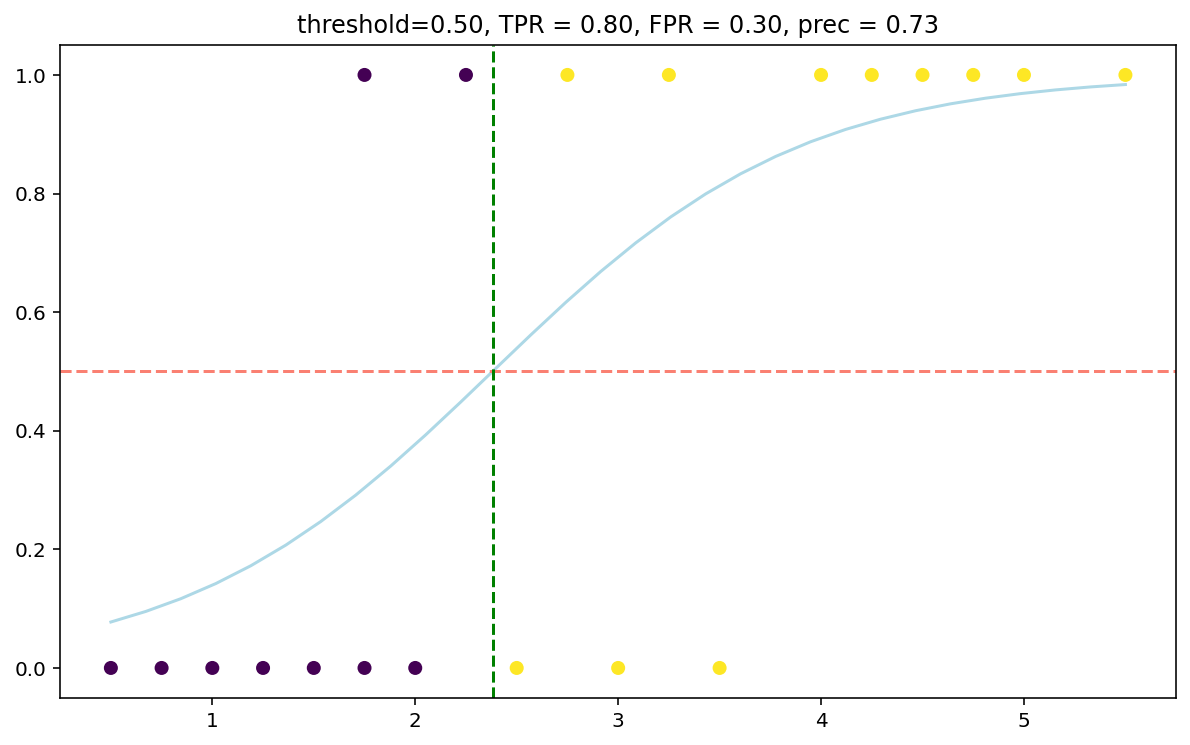

In [37]:
plt.figure(figsize=(10, 6))
plot_threshold(model, X, y, .5);

In [38]:
@interact(threshold=(0.05, .95, .05))
def plot(threshold):
    plt.figure(figsize=(10, 6))
    plot_threshold(model, X, y, threshold);
#     plt.savefig(f'chart_{pd.Timestamp.now().strftime("%Y%m%dT%H%M%S")}.svg')        

interactive(children=(FloatSlider(value=0.45, description='threshold', max=0.95, min=0.05, step=0.05), Output(…

In [39]:
X_test

,Hours
1,0.75
17,4.75
2,1.00
5,1.75
11,3.00
0,0.50


In [40]:
predicted

array([0, 1, 0, 0, 1, 0], dtype=int64)

In [41]:
X_test['Hours'].values

array([0.75, 4.75, 1.  , 1.75, 3.  , 0.5 ])

In [42]:
y_test.values

array([0, 1, 0, 0, 0, 0], dtype=int64)

In [43]:
predicted = model.predict(X_test)
predicted

array([0, 1, 0, 0, 1, 0], dtype=int64)

## scikit-learn: confusion matrix
$$
\begin{bmatrix}
C_{0,0} & C_{0,1} \\
C_{1,0} & C_{1,1}
\end{bmatrix}
=
\begin{bmatrix}
tn&fp \\
fn&tp
\end{bmatrix}
$$

<table>
<tr>
    <td></td>
    <td>predicted false</td>
    <td>predicted true</td>
</tr>
<tr>
    <td>actual false</td>
    <td>tn</td>
    <td>fp</td>
</tr>
<tr>
    <td>actual true</td>
    <td>fn</td>
    <td>tp</td>
</tr>
<table>

In [44]:
metrics.confusion_matrix(y_test, predicted) # y_true, y_predict

array([[4, 1],
       [0, 1]], dtype=int64)

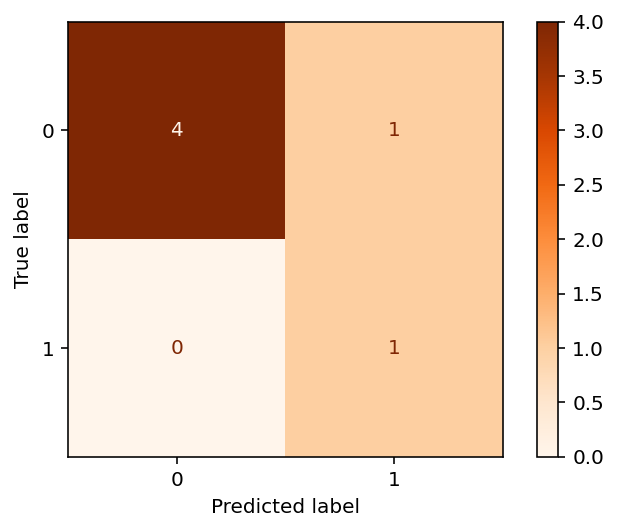

In [45]:
metrics.plot_confusion_matrix(model, X_test, y_test, cmap='Oranges')  

In [46]:
def pretty_xtab_confusion_matrix(y_true, y_predict):
    '''
    xtab y_true with y_predict with labels and total
    '''
    return pd.crosstab(y_true, y_predict, 
                       rownames=['Actual'], 
                       colnames=['Predicted'],
                       margins=True, margins_name='Total')  

In [47]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Hours,0.5,0.75,1.0,1.25,1.5,1.75,1.75,2.0,2.25,2.5,2.75,3.0,3.25,3.5,4.0,4.25,4.5,4.75,5.0,5.5
Pass,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1
PassFail,Fail,Fail,Fail,Fail,Fail,Fail,Pass,Fail,Pass,Fail,Pass,Fail,Pass,Fail,Pass,Pass,Pass,Pass,Pass,Pass


In [48]:
pretty_xtab_confusion_matrix(y_test, predicted)

Predicted,0,1,Total
Actual,,,
0,4,1,5
1,0,1,1
Total,4,2,6


In [49]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predicted).ravel()

In [50]:
print(f'tn = {tn}')
print(f'fp = {fp}')
print(f'fn = {fn}')
print(f'tp = {tp}')

tn = 4
fp = 1
fn = 0
tp = 1


$$Accuracy={\frac {{TP+TN} }{TP + TN +FP + FN} }\\
Precision={\frac {TP}{TP+FP}}\\
Recall={\frac {TP}{TP+FN}}\\
F1 = 2 \times {\frac {precision \times recall} {precision + recall}}
$$

In [51]:
model.score(X_test, y_test)

0.8333333333333334

In [52]:
metrics.accuracy_score(y_test, predicted)

0.8333333333333334

In [53]:
metrics.precision_score(y_test, predicted)

0.5

In [54]:
metrics.recall_score(y_test, predicted)

1.0

In [55]:
metrics.f1_score(y_test, predicted)

0.6666666666666666

In [56]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.50      1.00      0.67         1

    accuracy                           0.83         6
   macro avg       0.75      0.90      0.78         6
weighted avg       0.92      0.83      0.85         6



In [57]:
y_test.value_counts() # support

0    5
1    1
Name: Pass, dtype: int64

In [58]:
metrics.precision_recall_fscore_support(y_test, predicted)

(array([1. , 0.5]),
 array([0.8, 1. ]),
 array([0.88888889, 0.66666667]),
 array([5, 1], dtype=int64))

In [59]:
tp/(tp + fp) # precision (class = 1)

0.5

In [60]:
tp/(tp + fn) # recall (class = 1)

1.0

In [61]:
tn/(tn + fn) # precision (class = 0)

1.0

In [62]:
tn/(tn + fp) # recall (class = 0)

0.8